In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use(["ggplot", "../.default.mplstyle"])

In [6]:
%matplotlib inline

In [4]:
import traceback
import numpy as np
import pandas as pd
import GPy
import scipy

import aggregate
import objective
import aquisition
import distribution
import modeler

# Regret

ackley 1 simple
(163, 200, 1)
(185, 200, 1)
(200, 200, 1)
ackley 2 simple
(50, 200, 1)
(50, 200, 1)
(50, 200, 1)
michalewicz 1 simple
(164, 200, 1)
(200, 200, 1)
(200, 200, 1)
michalewicz 2 simple
(50, 200, 1)
(50, 200, 1)
(50, 200, 1)
rastrigin 1 simple
(163, 200, 1)
(200, 200, 1)
(200, 200, 1)
rastrigin 2 simple
(50, 200, 1)
(50, 200, 1)
(50, 200, 1)
schwefel 1 simple
(164, 200, 1)
(200, 200, 1)
(200, 200, 1)
schwefel 2 simple
(50, 200, 1)
(50, 200, 1)
(50, 200, 1)


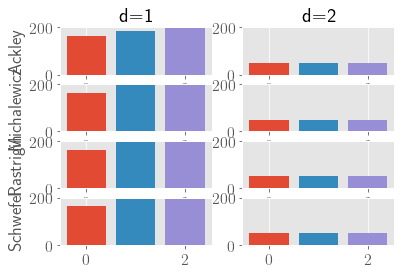

In [79]:
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
            
        print(o.__name__.lower(), d, metr)

        ax = plt.subplot(4, 2, i*2+d)
        if d == 1:
            plt.ylabel(o.__name__)
            
        if i == 0:
            plt.title("d={}".format(d))

        for j, meth in enumerate(["sbucb", "mean", "random"]):
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d{}/{}/{}/sample_size1/".format(d, o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
            )
            print(r.frame.shape)
            plt.bar(j, r.frame.shape[0])
        
        plt.ylim(0, 200)

ackley 1 simple
ackley 2 simple
michalewicz 1 simple
michalewicz 2 simple
rastrigin 1 simple
rastrigin 2 simple
schwefel 1 simple
schwefel 2 simple


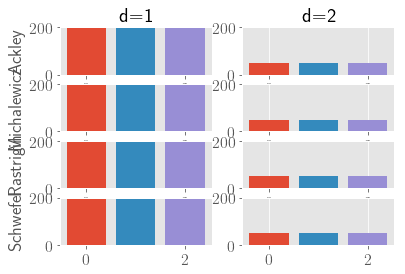

In [80]:
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
            
        print(o.__name__.lower(), d, metr)

        ax = plt.subplot(4, 2, i*2+d)
        if d == 1:
            plt.ylabel(o.__name__)
            
        if i == 0:
            plt.title("d={}".format(d))

        for j, meth in enumerate(["sbucb", "mean", "random"]):
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d{}/{}/{}/sample_size5/".format(d, o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
            )
            plt.bar(j, r.frame.shape[0])
            
        plt.ylim(0, 200)

ackley
sbucb (163, 200, 1)
mean (185, 200, 1)
random (200, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
michalewicz
sbucb (164, 200, 1)
mean (200, 200, 1)
random (200, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
rastrigin
sbucb (163, 200, 1)
mean (200, 200, 1)
random (200, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)
schwefel
sbucb (164, 200, 1)
mean (200, 200, 1)
random (200, 200, 1)
sbucb (50, 200, 1)
mean (50, 200, 1)
random (50, 200, 1)


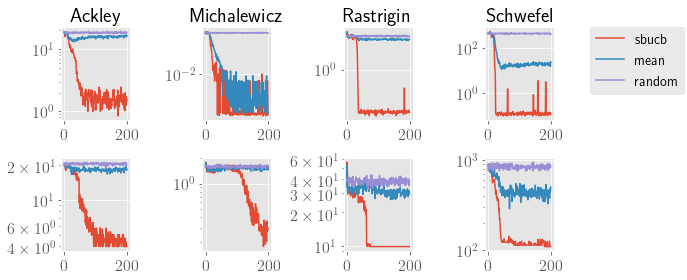

In [81]:
fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            print(meth, r.frame.shape)
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            print(meth, r.frame.shape)
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig("figures/regret-average-multidim-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


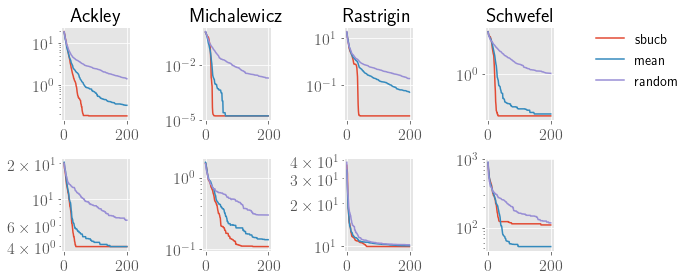

In [82]:
fig = plt.figure(figsize=(8, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    plt.subplot(2, 4, i+1)
    plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if i==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 4, i+5)
    # plt.title(o.__name__)
    plt.semilogy()

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .88), loc=2, borderaxespad=0., frameon=False)
    
plt.tight_layout()
plt.savefig("figures/regret-simple-multidim-sequential.pdf", bbox_inches='tight')

ackley 1 mean
ackley 1 simple
ackley 2 mean
ackley 2 simple
michalewicz 1 mean
michalewicz 1 simple
michalewicz 2 mean
michalewicz 2 simple
rastrigin 1 mean
rastrigin 1 simple
rastrigin 2 mean
rastrigin 2 simple
schwefel 1 mean
schwefel 1 simple
schwefel 2 mean
schwefel 2 simple


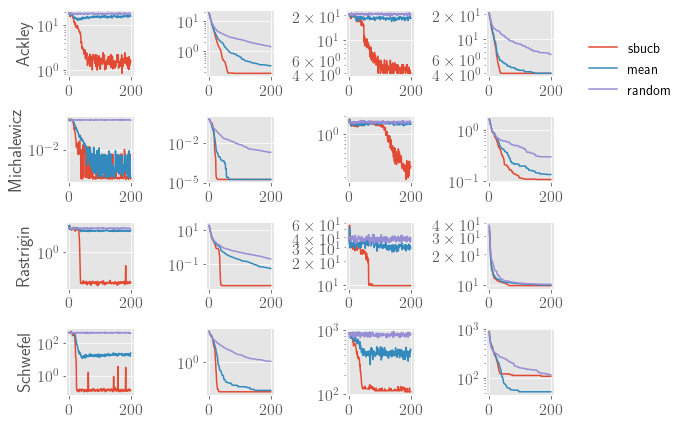

In [83]:
fig = plt.figure(figsize=(8, 6))

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        for k, metr in enumerate(["mean", "simple"]):
            
            print(o.__name__.lower(), d, metr)

            ax = plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
                
#                 if i == 0:
#                     plt.text(1.2, 1.25, "d=1", horizontalalignment='center',
#                              verticalalignment='center', transform = ax.transAxes)
            
            plt.semilogy(basey=10)

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/{}/sample_size1/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    if i==0 and d==1 and k==0:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
                    else:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

                except Exception as e:
                    print(e)
                    traceback.print_exc()
                    
fig.legend(bbox_to_anchor=(1.0125, .9), loc=2, borderaxespad=0., frameon=False)            
plt.tight_layout()
plt.savefig("figures/regret-both-multidim-sequential.pdf", bbox_inches='tight')

ackley 1 mean
ackley 1 simple
ackley 2 mean
ackley 2 simple
michalewicz 1 mean
michalewicz 1 simple
michalewicz 2 mean
michalewicz 2 simple
rastrigin 1 mean
rastrigin 1 simple
rastrigin 2 mean
rastrigin 2 simple
schwefel 1 mean
schwefel 1 simple
schwefel 2 mean
schwefel 2 simple


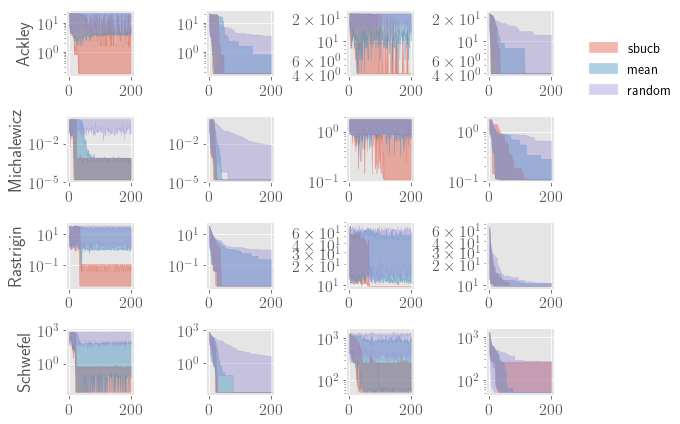

In [84]:
fig = plt.figure(figsize=(8, 6))

alpha = 10

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        for k, metr in enumerate(["mean", "simple"]):
            
            print(o.__name__.lower(), d, metr)

            ax = plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
                
#                 if i == 0:
#                     plt.text(1.2, 1.25, "d=1", horizontalalignment='center',
#                              verticalalignment='center', transform = ax.transAxes)
            
            plt.semilogy(basey=10)

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/{}/sample_size1/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    if i==0 and d==1 and k==0:
                        plt.fill_between(np.arange(r.mean.shape[0]),
                                         r.percentile(alpha/2)[:, 0], r.percentile(100-alpha/2)[:, 0],
                                         label=meth, color="C{}".format(j), alpha=.4)
                    else:
                        plt.fill_between(np.arange(r.mean.shape[0]),
                                         r.percentile(alpha/2)[:, 0], r.percentile(100-alpha/2)[:, 0],
                                         color="C{}".format(j), alpha=.4)

                except Exception as e:
                    print(e)
                    traceback.print_exc()
                    
fig.legend(bbox_to_anchor=(1.0125, .9), loc=2, borderaxespad=0., frameon=False)            
plt.tight_layout()
plt.savefig("figures/regret-both-multidim-sequential-error.pdf", bbox_inches='tight')

ackley 1 mean
ackley 1 simple
ackley 2 mean
ackley 2 simple
michalewicz 1 mean
michalewicz 1 simple
michalewicz 2 mean
michalewicz 2 simple
rastrigin 1 mean
rastrigin 1 simple
rastrigin 2 mean
rastrigin 2 simple
schwefel 1 mean
schwefel 1 simple
schwefel 2 mean
schwefel 2 simple


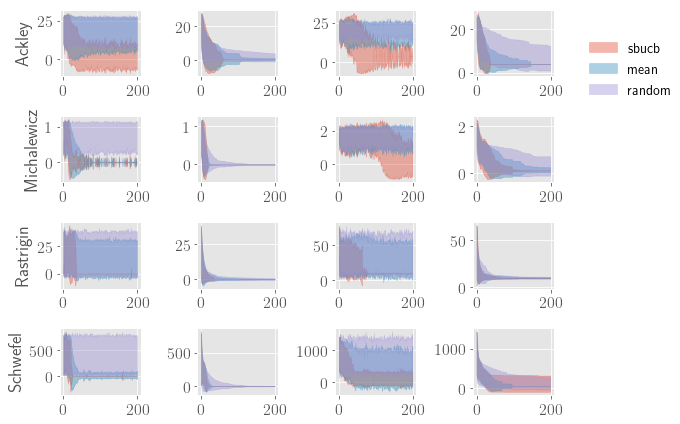

In [78]:
fig = plt.figure(figsize=(8, 6))

alpha = 10

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        for k, metr in enumerate(["mean", "simple"]):
            
            print(o.__name__.lower(), d, metr)

            ax = plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
                
#                 if i == 0:
#                     plt.text(1.2, 1.25, "d=1", horizontalalignment='center',
#                              verticalalignment='center', transform = ax.transAxes)
            
            #plt.semilogy(basey=10)

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/{}/sample_size1/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    if i==0 and d==1 and k==0:
                        plt.fill_between(np.arange(r.mean.shape[0]),
                                         (r.mean - 2*r.std)[:, 0], (r.mean + 2*r.std)[:, 0],
                                         label=meth, color="C{}".format(j), alpha=.4)
                    else:
                        plt.fill_between(np.arange(r.mean.shape[0]),
                                         (r.mean - 2*r.std)[:, 0], (r.mean + 2*r.std)[:, 0],
                                         color="C{}".format(j), alpha=.4)

                except Exception as e:
                    print(e)
                    traceback.print_exc()
                    
fig.legend(bbox_to_anchor=(1.0125, .9), loc=2, borderaxespad=0., frameon=False)            
plt.tight_layout()
plt.savefig("figures/regret-both-multidim-sequential-stderror.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


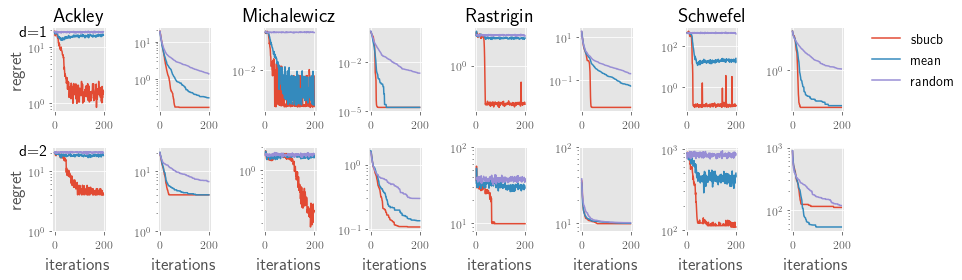

In [85]:
fig = plt.figure(figsize=(12, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    ax = plt.subplot(2, 8, i*2+1)
    plt.title(o.__name__)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    if o.__name__ == "Ackley":
        plt.ylabel("regret")
        plt.text(-.35, .95, "d=1", horizontalalignment='center', fontsize=16,
                             verticalalignment='center', transform = ax.transAxes)

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            if i==0:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 8, i*2+2)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d1/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    ax = plt.subplot(2, 8, i*2+9)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            # plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))
            ax.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    ax.set_yscale('log')
    
    if o.__name__ == "Ackley":
        plt.ylim(1, 25)
        plt.ylabel("regret")
        plt.text(-.35, .95, "d=2", horizontalalignment='center', fontsize=16,
                             verticalalignment='center', transform = ax.transAxes)
        
    if o.__name__ == "Rastrigin":
        plt.ylim(8, 100)
            
    plt.subplot(2, 8, i*2+10)
    plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    if o.__name__ == "Ackley":
        plt.ylim(1, 25)
        
    if o.__name__ == "Rastrigin":
        plt.ylim(8, 100)

fig.legend(bbox_to_anchor=(1.0025, .88), loc=2, borderaxespad=0., frameon=False)
    
plt.tight_layout()
plt.savefig("figures/regret-both-compact-multidim-sequential.pdf", bbox_inches='tight')

ackley 1 mean
ackley 1 simple
ackley 2 mean
ackley 2 simple
michalewicz 1 mean
michalewicz 1 simple
michalewicz 2 mean
michalewicz 2 simple
rastrigin 1 mean
rastrigin 1 simple
rastrigin 2 mean
rastrigin 2 simple
schwefel 1 mean
schwefel 1 simple
schwefel 2 mean
schwefel 2 simple


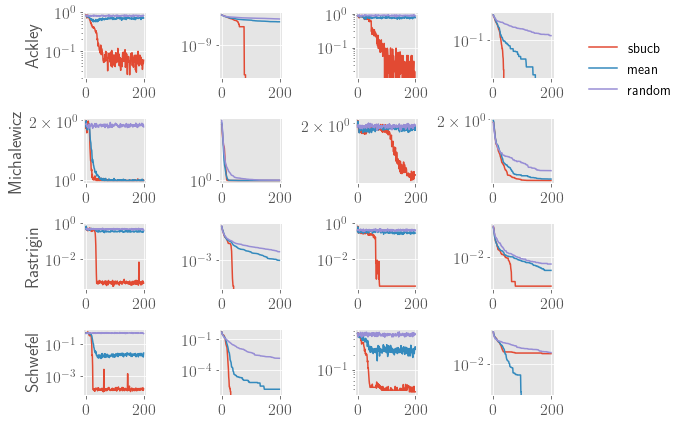

In [8]:
fig = plt.figure(figsize=(8, 6))

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        n = np.power(1024, 1/d)
        for k, metr in enumerate(["mean", "simple"]):
            
            print(o.__name__.lower(), d, metr)
            x = o(d=d).sample_space(n)
            y = o(d=d)(x)

            ax = plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
                
#                 if i == 0:
#                     plt.text(1.2, 1.25, "d=1", horizontalalignment='center',
#                              verticalalignment='center', transform = ax.transAxes)
            
            plt.semilogy(basey=10)

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/{}/sample_size1/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    if i==0 and d==1 and k==0:
                        plt.plot(np.arange(r.mean.shape[0]), (r.mean - y.min())/(y.max() - y.min()), label=meth, c="C{}".format(j))
                    else:
                        plt.plot(np.arange(r.mean.shape[0]), (r.mean - y.min())/(y.max() - y.min()), c="C{}".format(j))

                except Exception as e:
                    print(e)
                    traceback.print_exc()
                    
fig.legend(bbox_to_anchor=(1.0125, .9), loc=2, borderaxespad=0., frameon=False)            
plt.tight_layout()
# plt.savefig("figures/regret-both-multidim-sequential.pdf", bbox_inches='tight')

ackley
michalewicz
rastrigin
schwefel


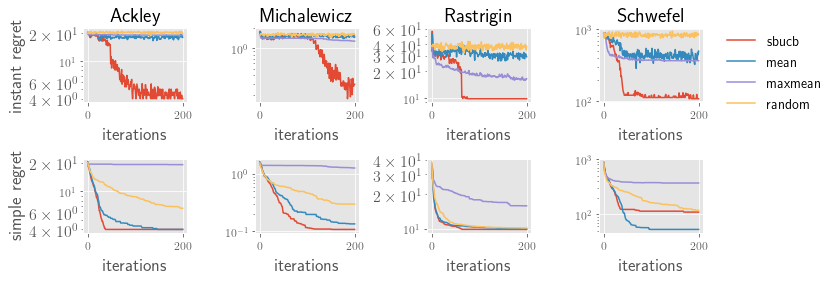

In [187]:
fig = plt.figure(figsize=(10, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
  
    ax = plt.subplot(2, 4, i+1)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "maxmean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
                cummean=False
            )
            if meth == "random":
                j += 1
            if i==0:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    ax.set_yscale('log')
    
    if o.__name__ == "Ackley":
        plt.ylabel("instant regret")
    plt.title(o.__name__)
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")
    if o.__name__ == "Ackley":
        plt.ylabel("simple regret")

    for j, meth in enumerate(["sbucb", "mean", "maxmean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-sequential-d2/{}/{}/sample_size1/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            if meth == "random":
                j += 1
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()


fig.legend(bbox_to_anchor=(1.0025, .88), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout(1.001)
plt.savefig("figures/regret-both-compact-d2-sequential.pdf", bbox_inches='tight')

# batch 

ackley 1 mean sbucb (200, 200, 1)
ackley 1 mean mean (200, 200, 1)
ackley 1 mean random (200, 200, 1)
ackley 1 simple sbucb (200, 200, 1)
ackley 1 simple mean (200, 200, 1)
ackley 1 simple random (200, 200, 1)
ackley 2 mean sbucb (50, 200, 1)
ackley 2 mean mean (50, 200, 1)
ackley 2 mean random (50, 200, 1)
ackley 2 simple sbucb (50, 200, 1)
ackley 2 simple mean (50, 200, 1)
ackley 2 simple random (50, 200, 1)
michalewicz 1 mean sbucb (200, 200, 1)
michalewicz 1 mean mean (200, 200, 1)
michalewicz 1 mean random (200, 200, 1)
michalewicz 1 simple sbucb (200, 200, 1)
michalewicz 1 simple mean (200, 200, 1)
michalewicz 1 simple random (200, 200, 1)
michalewicz 2 mean sbucb (50, 200, 1)
michalewicz 2 mean mean (50, 200, 1)
michalewicz 2 mean random (50, 200, 1)
michalewicz 2 simple sbucb (50, 200, 1)
michalewicz 2 simple mean (50, 200, 1)
michalewicz 2 simple random (50, 200, 1)
rastrigin 1 mean sbucb (200, 200, 1)
rastrigin 1 mean mean (200, 200, 1)
rastrigin 1 mean random (200, 200, 1)
r

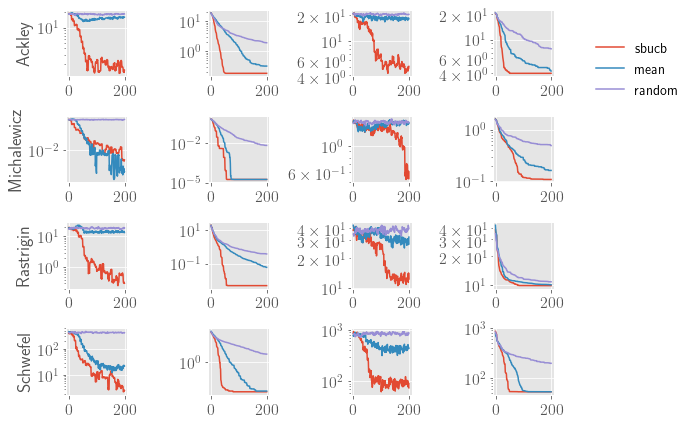

In [79]:
fig = plt.figure(figsize=(8, 6))

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        for k, metr in enumerate(["mean", "simple"]):

            plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
            
            plt.semilogy()

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-batch5-d{}/{}/{}/sample_size5/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    print(o.__name__.lower(), d, metr, meth, r.frame.shape)
                    if i==0 and d==1 and k==0:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
                    else:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

                except Exception as e:
                    print(e)
                    traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()
plt.savefig("figures/regret-both-multidim-batch5.pdf", bbox_inches='tight')

ackley 1 mean sbucb (200, 200, 1)
ackley 1 mean mean (200, 200, 1)
ackley 1 mean random (200, 200, 1)
ackley 1 simple sbucb (200, 200, 1)
ackley 1 simple mean (200, 200, 1)
ackley 1 simple random (200, 200, 1)
ackley 2 mean sbucb (50, 200, 1)
ackley 2 mean mean (50, 200, 1)
ackley 2 mean random (50, 200, 1)
ackley 2 simple sbucb (50, 200, 1)
ackley 2 simple mean (50, 200, 1)
ackley 2 simple random (50, 200, 1)
michalewicz 1 mean sbucb (200, 200, 1)
michalewicz 1 mean mean (200, 200, 1)
michalewicz 1 mean random (200, 200, 1)
michalewicz 1 simple sbucb (200, 200, 1)
michalewicz 1 simple mean (200, 200, 1)
michalewicz 1 simple random (200, 200, 1)
michalewicz 2 mean sbucb (50, 200, 1)
michalewicz 2 mean mean (50, 200, 1)
michalewicz 2 mean random (50, 200, 1)
michalewicz 2 simple sbucb (50, 200, 1)
michalewicz 2 simple mean (50, 200, 1)
michalewicz 2 simple random (50, 200, 1)
rastrigin 1 mean sbucb (200, 200, 1)
rastrigin 1 mean mean (200, 200, 1)
rastrigin 1 mean random (200, 200, 1)
r

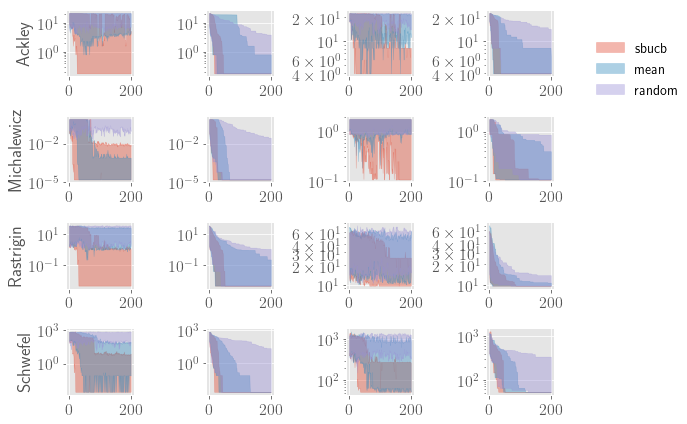

In [85]:
fig = plt.figure(figsize=(8, 6))

alpha = 10

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        for k, metr in enumerate(["mean", "simple"]):

            plt.subplot(4, 4, i*4+(d-1)*2+k+1)
            
            if d == 1 and k == 0:
                plt.ylabel(o.__name__)
            
            plt.semilogy()

            for j, meth in enumerate(["sbucb", "mean", "random"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/stochastic-batch5-d{}/{}/{}/sample_size5/".format(d, o.__name__.lower(), meth), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    print(o.__name__.lower(), d, metr, meth, r.frame.shape)
                    if i==0 and d==1 and k==0:
                        plt.fill_between(np.arange(r.mean.shape[0]), 
                                         r.percentile(alpha/2)[:, 0], r.percentile(100-alpha/2)[:, 0], 
                                         label=meth, color="C{}".format(j), alpha=.4)
                    else:
                        plt.fill_between(np.arange(r.mean.shape[0]), 
                                         r.percentile(alpha/2)[:, 0], r.percentile(100-alpha/2)[:, 0],
                                         color="C{}".format(j), alpha=.4)

                except Exception as e:
                    print(e)
                    traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()
plt.savefig("figures/regret-both-multidim-batch5-error.pdf", bbox_inches='tight')

ackley
(200, 200, 1)
(200, 200, 1)
(200, 200, 1)
michalewicz
(200, 200, 1)
(200, 200, 1)
(200, 200, 1)
rastrigin
(200, 200, 1)
(200, 200, 1)
(200, 200, 1)
schwefel
(200, 200, 1)
(200, 200, 1)
(200, 200, 1)


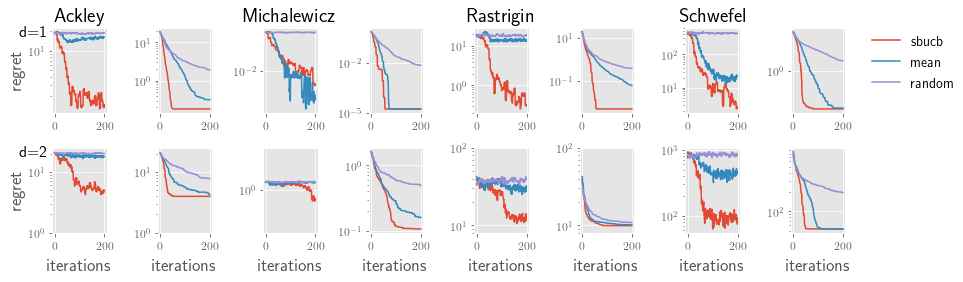

In [158]:
fig = plt.figure(figsize=(12, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())

    ax = plt.subplot(2, 8, i*2+1)
    plt.title(o.__name__)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    if o.__name__ == "Ackley":
        plt.ylabel("regret")
        plt.text(-.35, .95, "d=1", horizontalalignment='center', fontsize=16,
                             verticalalignment='center', transform = ax.transAxes)

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d1/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            print(r.frame.shape)
            if i==0:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    plt.subplot(2, 8, i*2+2)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d1/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    
            
    ax = plt.subplot(2, 8, i*2+9)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
            )
            # plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))
            ax.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    ax.set_yscale('log')
    if o.__name__ == "Michalewicz":
        plt.ylim(.08, 12)
    
    if o.__name__ == "Ackley":
        plt.ylim(1, 25)
        plt.ylabel("regret")
        plt.text(-.35, .95, "d=2", horizontalalignment='center', fontsize=16,
                             verticalalignment='center', transform = ax.transAxes)
        
    if o.__name__ == "Rastrigin":
        plt.ylim(8, 100)
            
    plt.subplot(2, 8, i*2+10)
    plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    if o.__name__ == "Ackley":
        plt.ylim(1, 25)
        
    if o.__name__ == "Rastrigin":
        plt.ylim(8, 100)
        

fig.legend(bbox_to_anchor=(1.0025, .88), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout(1.001)
# plt.savefig("figures/regret-both-compact-multidim-batch5.pdf", bbox_inches='tight')

In [182]:
from importlib import reload
reload(aggregate)

<module 'aggregate' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/aggregate.py'>

ackley
michalewicz
rastrigin
schwefel


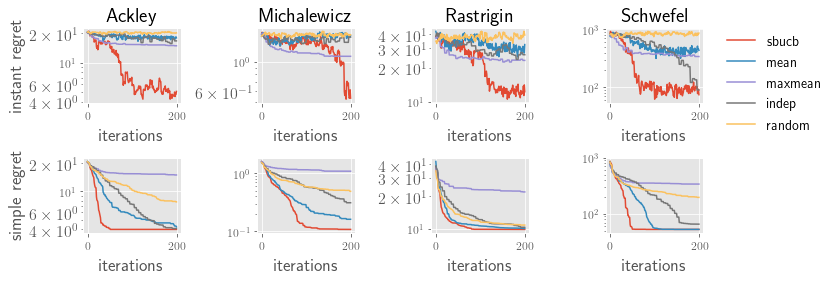

In [186]:
fig = plt.figure(figsize=(10, 4))
for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    print(o.__name__.lower())
  
    ax = plt.subplot(2, 4, i+1)
    # plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")

    for j, meth in enumerate(["sbucb", "mean", "maxmean", "indep", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=False,
                cummean=False
            )
            if i==0:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))
            else:
                plt.semilogy(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()
            
    ax.set_yscale('log')
    
    if o.__name__ == "Ackley":
        plt.ylabel("instant regret")
    plt.title(o.__name__)
            
    plt.subplot(2, 4, i+5)
    plt.semilogy()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel("iterations")
    if o.__name__ == "Ackley":
        plt.ylabel("simple regret")

    for j, meth in enumerate(["sbucb", "mean", "maxmean", "indep", "random"]):
        try:
            r = aggregate.Aggregate.build(
                "output/stochastic-batch5-d2/{}/{}/sample_size5/".format(o.__name__.lower(), meth), 
                'regret.csv', 
                [0],
                cummin=True,
            )
            plt.plot(np.arange(r.mean.shape[0]), r.mean, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()


fig.legend(bbox_to_anchor=(1.0025, .88), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout(1.001)
plt.savefig("figures/regret-both-compact-d2-batch5.pdf", bbox_inches='tight')

# Variance

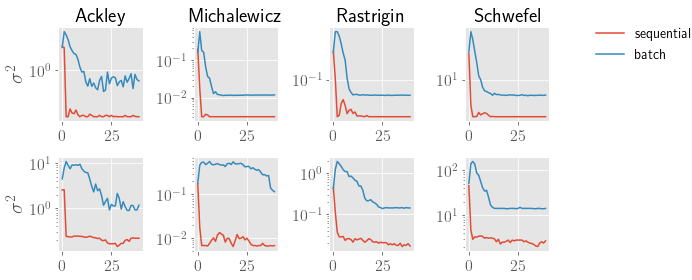

In [188]:
fig = plt.figure(figsize=(8,4))

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        plt.subplot(2,4, i + 1 + (d-1)*4)
        
        if d == 1:
            plt.title(o.__name__)
        if i == 0:
            plt.ylabel("$\sigma^2$", fontsize=20)
            
        label = None
        
        r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/sbucb/sample_size1/".format(d, o.__name__.lower()), 
                        'hyperparams.csv', 
                        [d],
                    )
        
        if d == 1 and i == 0:
            label = "sequential"
            
        plt.plot(np.arange(40), r.mean[:40], label=label)
        
        r = aggregate.Aggregate.build(
                        "output/stochastic-batch5-d{}/{}/sbucb/sample_size5/".format(d, o.__name__.lower()), 
                        'hyperparams.csv', 
                        [d],
                    )
        
        if d == 1 and i == 0:
            label = "batch"
            
        plt.plot(np.arange(r.mean.shape[0]), r.mean, label=label)
        
        plt.semilogy()
        
fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()
plt.savefig("figures/variance-both.pdf", bbox_inches='tight')

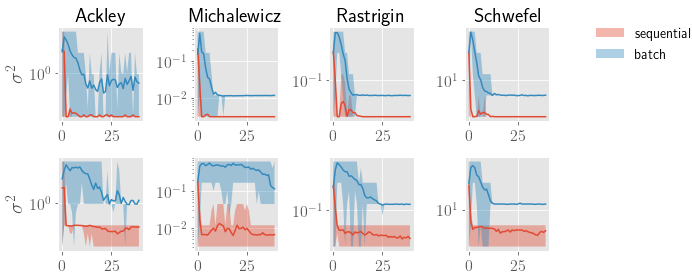

In [91]:
fig = plt.figure(figsize=(8,4))

alpha = 10

for i, o in enumerate([
    objective.Ackley, 
    objective.Michalewicz,
    objective.Rastrigin,
    objective.Schwefel
]):
    for d in [1, 2]:
        plt.subplot(2,4, i + 1 + (d-1)*4)
        
        if d == 1:
            plt.title(o.__name__)
        if i == 0:
            plt.ylabel("$\sigma^2$", fontsize=20)
            
        label = None
        
        r = aggregate.Aggregate.build(
                        "output/stochastic-sequential-d{}/{}/sbucb/sample_size1/".format(d, o.__name__.lower()), 
                        'hyperparams.csv', 
                        [d],
                    )
        
        if d == 1 and i == 0:
            label = "sequential"
        
        plt.plot(np.arange(40), r.mean[:40, :])
        plt.fill_between(np.arange(40), 
                         r.percentile(alpha/2)[:40, 0], r.percentile(100-alpha/2)[:40, 0],
                         alpha=.4, label=label
                        )
        
        r = aggregate.Aggregate.build(
                        "output/stochastic-batch5-d{}/{}/sbucb/sample_size5/".format(d, o.__name__.lower()), 
                        'hyperparams.csv', 
                        [d],
                    )
        
        if d == 1 and i == 0:
            label = "batch"
        
        plt.plot(np.arange(r.mean.shape[0]), r.mean)
        plt.fill_between(np.arange(r.mean.shape[0]), 
                         r.percentile(alpha/2)[:, 0], r.percentile(100-alpha/2)[:, 0],
                         alpha=.4, label=label
                        )
        
        plt.semilogy()
        
fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()
plt.savefig("figures/variance-both-error.pdf", bbox_inches='tight')

# LacI

(35, 1000, 1)
(50, 1000, 1)
(50, 1000, 1)


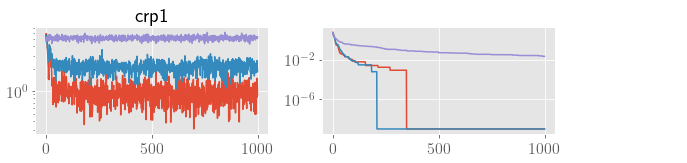

In [115]:
fig = plt.figure(figsize=(8,4))

plt.subplot(221)
plt.semilogy()
plt.title("crp1")
for j, meth in enumerate(["sbucb", "mean", "random"]):
    
    r = aggregate.Aggregate.build(
        "output/lac-crp1-sequential/{}/sample_size1/".format(meth), 
        'regret.csv', 
        [0],
        cummin=False,
    )
    print(r.frame.shape)
    plt.plot(np.arange(r.mean.shape[0]), r.mean, label=meth, c="C{}".format(j))    
    
    
plt.subplot(222)
plt.semilogy()
for j, meth in enumerate(["sbucb", "mean", "random"]):
    r = aggregate.Aggregate.build(
        "output/lac-crp1-sequential/{}/sample_size1/".format(meth), 
        'regret.csv', 
        [0],
        cummin=True,
    )
    plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-9, c="C{}".format(j))
    
fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()
plt.savefig("figures/lac-regret-both.pdf", bbox_inches='tight')

crp1 mean sbucb (50, 200, 1)
crp1 mean mean (50, 200, 1)
crp1 simple sbucb (50, 200, 1)
crp1 simple mean (50, 200, 1)
crp1 mean sbucb (50, 200, 1)
crp1 mean mean (50, 200, 1)
crp1 simple sbucb (50, 200, 1)
crp1 simple mean (50, 200, 1)
crp2 mean sbucb (50, 200, 1)
crp2 mean mean (50, 200, 1)
crp2 simple sbucb (50, 200, 1)
crp2 simple mean (50, 200, 1)
crp2 mean sbucb (50, 200, 1)
crp2 mean mean (50, 200, 1)
crp2 simple sbucb (50, 200, 1)
crp2 simple mean (50, 200, 1)
rnap1 mean sbucb (50, 200, 1)
rnap1 mean mean (50, 200, 1)
rnap1 simple sbucb (50, 200, 1)
rnap1 simple mean (50, 200, 1)
rnap1 mean sbucb (50, 200, 1)
rnap1 mean mean (50, 200, 1)
rnap1 simple sbucb (50, 200, 1)
rnap1 simple mean (50, 200, 1)
rnap2 mean sbucb (50, 200, 1)
rnap2 mean mean (50, 200, 1)
rnap2 simple sbucb (50, 200, 1)
rnap2 simple mean (50, 200, 1)
rnap2 mean sbucb (50, 200, 1)
rnap2 mean mean (50, 200, 1)
rnap2 simple sbucb (50, 200, 1)
rnap2 simple mean (50, 200, 1)


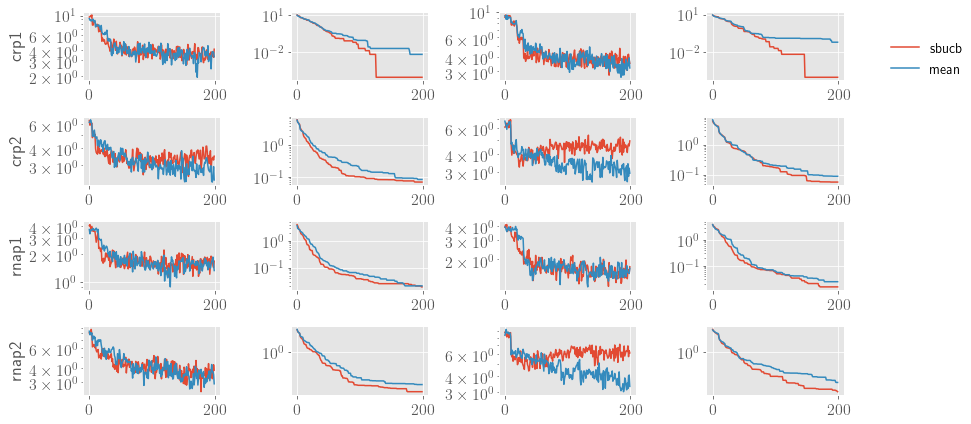

In [221]:
fig = plt.figure(figsize=(12, 6))

alpha = 10

for i, o in enumerate([
    "crp1",
    "crp2",
    "rnap1",
    "rnap2"
]):
    for l, b in enumerate([5, 10]):
        blabel = "sequential" if b == 1 else "batch{}".format(b)
        for k, metr in enumerate(["mean", "simple"]):
            plt.subplot(4, 4, i*4+l*2+k+1)
            
            if l == 0 and k == 0:
                plt.ylabel(o)
            
            plt.semilogy()

            for j, meth in enumerate(["sbucb", "mean"]):
                try:
                    r = aggregate.Aggregate.build(
                        "output/lac-{}-{}/{}/sample_size{}/".format(o, blabel, meth, b), 
                        'regret.csv', 
                        [0],
                        cummin=metr=="simple",
                    )
                    print(o, metr, meth, r.frame.shape)
                    if i==0 and l==0 and k==0:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-4, label=meth, c="C{}".format(j))
                    else:
                        plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-4, c="C{}".format(j))
                        
                except Exception as e:
                    print(e)
                    traceback.print_exc()

fig.legend(bbox_to_anchor=(1.025, .9), loc=2, borderaxespad=0., frameon=False)
plt.tight_layout()

rnap1 mean sbucb (35, 500, 1)
rnap1 mean mean (50, 500, 1)
[Errno 2] No such file or directory: 'output/lac-crp1-batch50/random/sample_size50/'


Traceback (most recent call last):
  File "<ipython-input-199-878b95228437>", line 12, in <module>
    cummin=metr=="simple",
  File "/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/aggregate.py", line 40, in build
    dirs = os.listdir(path)
FileNotFoundError: [Errno 2] No such file or directory: 'output/lac-crp1-batch50/random/sample_size50/'


rnap1 mean indep (50, 500, 1)
rnap1 simple sbucb (35, 500, 1)
rnap1 simple mean (50, 500, 1)
[Errno 2] No such file or directory: 'output/lac-crp1-batch50/random/sample_size50/'


Traceback (most recent call last):
  File "<ipython-input-199-878b95228437>", line 12, in <module>
    cummin=metr=="simple",
  File "/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/aggregate.py", line 40, in build
    dirs = os.listdir(path)
FileNotFoundError: [Errno 2] No such file or directory: 'output/lac-crp1-batch50/random/sample_size50/'


rnap1 simple indep (50, 500, 1)


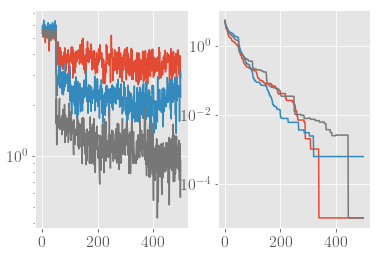

In [199]:
for k, metr in enumerate(["mean", "simple"]):
    plt.subplot(1, 2, k+1)

    plt.semilogy()
    
    for j, meth in enumerate(["sbucb", "mean", "random", "indep"]):
        try:
            r = aggregate.Aggregate.build(
                "output/lac-crp1-batch50/{}/sample_size50/".format(meth),
                'regret.csv', 
                [0],
                cummin=metr=="simple",
            )
            print(o, metr, meth, r.frame.shape)
            if i==0 and l==0 and k==0:
                plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-5, label=meth, c="C{}".format(j))
            else:
                plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-5, c="C{}".format(j))

        except Exception as e:
            print(e)
            traceback.print_exc()

mean sbucb (5, 165, 1)
mean mean (10, 200, 1)
simple sbucb (5, 165, 1)
simple mean (10, 200, 1)
mean sbucb (10, 200, 1)
mean mean (10, 200, 1)
simple sbucb (10, 200, 1)
simple mean (10, 200, 1)


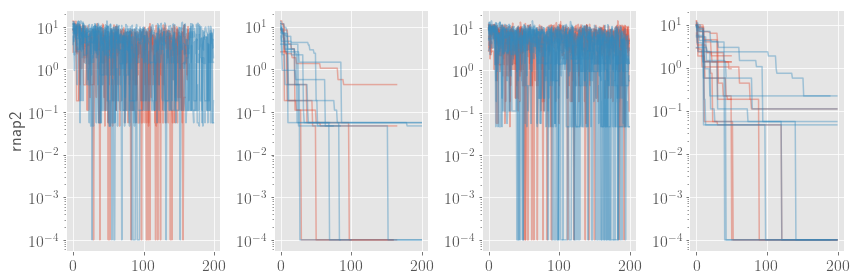

In [216]:
plt.figure(figsize=(12, 4))

for l, b in enumerate([5, 10]):
    blabel = "sequential" if b == 1 else "batch{}".format(b)
    for k, metr in enumerate(["mean", "simple"]):
        plt.subplot(1, 4, l*2+k+1)

        if l == 0 and k == 0:
            plt.ylabel(o)

        plt.semilogy()

        for j, meth in enumerate(["sbucb", "mean"]):
            try:
                r = aggregate.Aggregate.build(
                    "output/lac-rnap2-{}/{}/sample_size{}/".format(blabel, meth, b), 
                    'regret.csv', 
                    [0],
                    cummin=metr=="simple",
                )
                print(metr, meth, r.frame.shape)
                if i==0 and l==0 and k==0:
                    #plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-9, label=meth, c="C{}".format(j))
                    plt.plot(np.arange(r.mean.shape[0]), r.frame+1e-4, label=meth, c="C{}".format(j), alpha=.4)
                else:
                    #plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-9, c="C{}".format(j))
                    plt.plot(np.arange(r.mean.shape[0]), r.frame[:, :, 0].T+1e-4, c="C{}".format(j), alpha=.4)

            except Exception as e:
                print(e)
                traceback.print_exc()
                
plt.tight_layout()

rnap1 simple sbucb (5, 69, 1)
rnap1 simple mean (5, 128, 1)
rnap1 simple sbucb (5, 20, 1)
rnap1 simple mean (5, 20, 1)


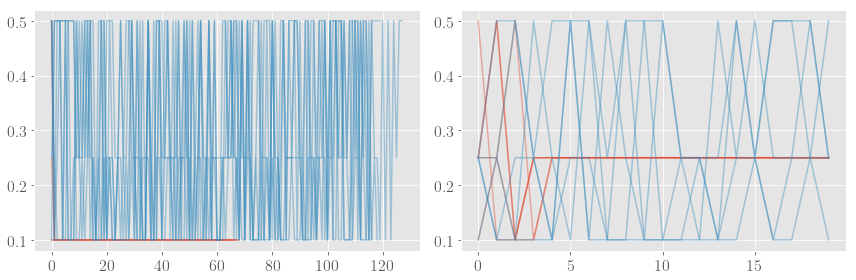

In [207]:
plt.figure(figsize=(12, 4))

for l, b in enumerate([1, 10]):
    blabel = "sequential" if b == 1 else "batch{}".format(b)
    plt.subplot(1, 2, l+1)

    if l == 0 and k == 0:
        plt.ylabel(o)

    for j, meth in enumerate(["sbucb", "mean"]):
        try:
            r = aggregate.Aggregate.build(
                "output/lac-crp1-{}-noiseful/{}/sample_size{}/".format(blabel, meth, b), 
                'hyperparams.csv', 
                [-1],
            )
            print(o, metr, meth, r.frame.shape)
            if i==0 and l==0 and k==0:
                #plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-9, label=meth, c="C{}".format(j))
                plt.plot(np.arange(r.mean.shape[0]), r.frame+1e-9, label=meth, c="C{}".format(j), alpha=.4)
            else:
                #plt.plot(np.arange(r.mean.shape[0]), r.mean+1e-9, c="C{}".format(j))
                plt.plot(np.arange(r.mean.shape[0]), r.frame[:, :, 0].T+1e-9, c="C{}".format(j), alpha=.4)

        except Exception as e:
            print(e)
            traceback.print_exc()
                
plt.tight_layout()

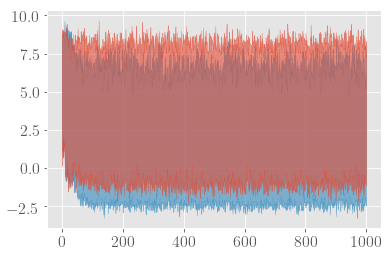

In [146]:
rsbucb = aggregate.Aggregate.build(
                        "output/lac-crp1-batch10/sbucb/sample_size10/", 
                        'regret.csv', 
                        [0],
                    )

rmean = aggregate.Aggregate.build(
                        "output/lac-crp1-batch10/mean/sample_size10/", 
                        'regret.csv', 
                        [0],
                    )

plt.fill_between(np.arange(1000), (rmean.mean - 2*rmean.std)[:, 0], (rmean.mean+ 2*rmean.std)[:, 0], alpha=0.6, color="C1")
plt.fill_between(np.arange(1000), (rsbucb.mean - 2*rsbucb.std)[:, 0], (rsbucb.mean+ 2*rsbucb.std)[:, 0], alpha=0.6, color="C0")